<a href="https://colab.research.google.com/github/Jael12Hephzibah/DataScience/blob/main/Data_Visualization_of_Bird_Strikes_between_2000_2011.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load the data from the CSV file
df = pd.read_csv('/content/Bird Strikes data.xlsx - Bird Strikes.csv')

In [4]:
# Display the first few rows of the dataframe
df.head()

,Record ID,Aircraft: Type,Airport: Name,Altitude bin,Aircraft: Make/Model,Wildlife: Number struck,Wildlife: Number Struck Actual,Effect: Impact to flight,FlightDate,Effect: Indicated Damage,...,Remains of wildlife sent to Smithsonian,Remarks,Wildlife: Size,Conditions: Sky,Wildlife: Species,Pilot warned of birds or wildlife?,Cost: Total $,Feet above ground,Number of people injured,Is Aircraft Large?
0,202152,Airplane,LAGUARDIA NY,> 1000 ft,B-737-400,Over 100,859,Engine Shut Down,11/23/00 0:00,Caused damage,...,False,FLT 753. PILOT REPTD A HUNDRED BIRDS ON UNKN T...,Medium,No Cloud,Unknown bird - medium,N,"30,736","1,500",0,Yes
1,208159,Airplane,DALLAS/FORT WORTH INTL ARPT,< 1000 ft,MD-80,Over 100,424,None,7/25/01 0:00,Caused damage,...,False,102 CARCASSES FOUND. 1 LDG LIGHT ON NOSE GEAR ...,Small,Some Cloud,Rock pigeon,Y,0,0,0,No
2,207601,Airplane,LAKEFRONT AIRPORT,< 1000 ft,C-500,Over 100,261,None,9/14/01 0:00,No damage,...,False,FLEW UNDER A VERY LARGE FLOCK OF BIRDS OVER AP...,Small,No Cloud,European starling,N,0,50,0,No
3,215953,Airplane,SEATTLE-TACOMA INTL,< 1000 ft,B-737-400,Over 100,806,Precautionary Landing,9/5/02 0:00,No damage,...,False,"NOTAM WARNING. 26 BIRDS HIT THE A/C, FORCING A...",Small,Some Cloud,European starling,Y,0,50,0,Yes
4,219878,Airplane,NORFOLK INTL,< 1000 ft,CL-RJ100/200,Over 100,942,None,6/23/03 0:00,No damage,...,False,NO DMG REPTD.,Small,No Cloud,European starling,N,0,50,0,No


In [5]:
# Count the number of bird strikes by aircraft make/model
strike_counts = df['Aircraft: Make/Model'].value_counts().head(10)

<ipython-input-6-cfbd9b5e678c>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=strike_counts.values, y=strike_counts.index, palette='magma')


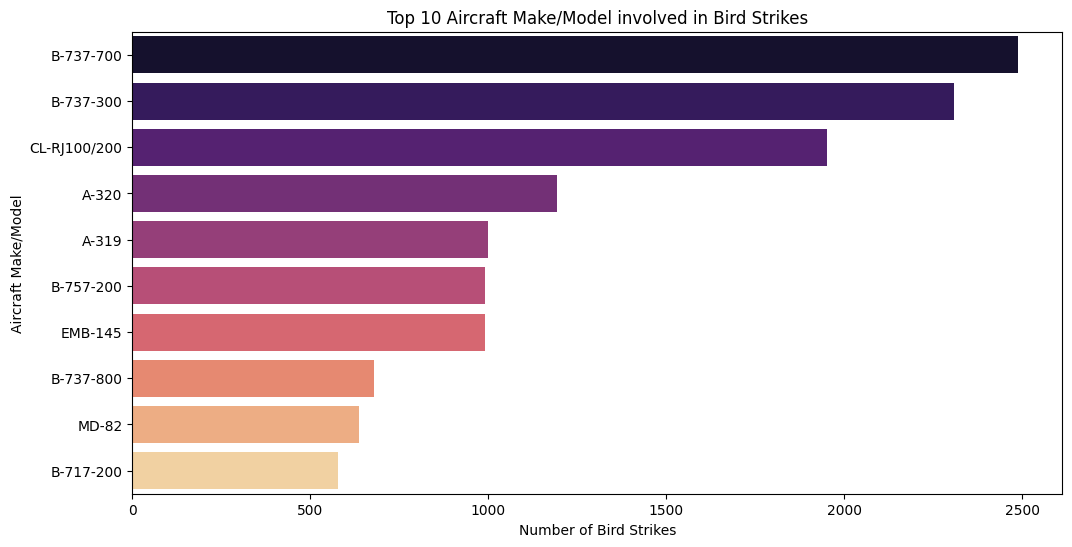

In [6]:
# Plotting
plt.figure(figsize=(12, 6))
sns.barplot(x=strike_counts.values, y=strike_counts.index, palette='magma')
plt.title('Top 10 Aircraft Make/Model involved in Bird Strikes')
plt.xlabel('Number of Bird Strikes')
plt.ylabel('Aircraft Make/Model')
plt.show()

In [7]:
# Count the number of bird strikes by impact to flight
impact_counts = df['Effect: Impact to flight'].value_counts()

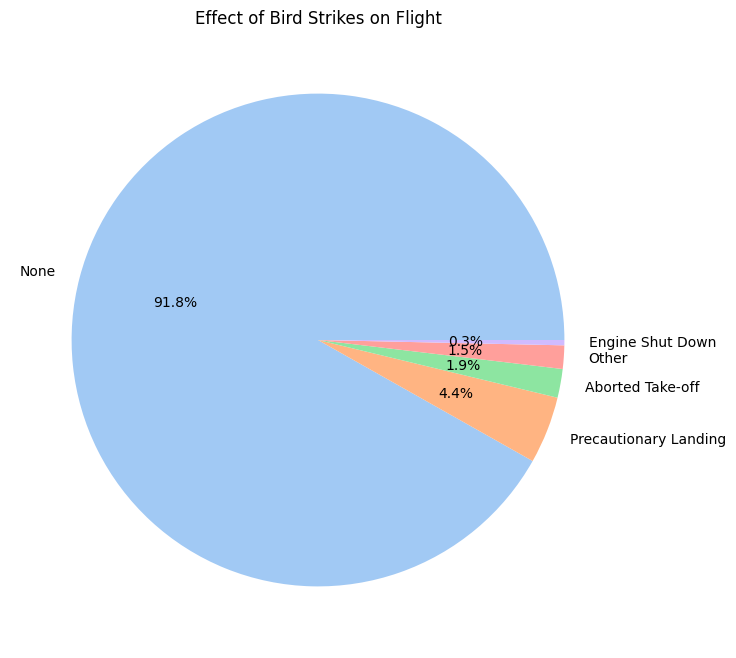

In [8]:
# Plotting
plt.figure(figsize=(8, 8))
plt.pie(impact_counts, labels=impact_counts.index, autopct='%1.1f%%', colors=sns.color_palette('pastel'))
plt.title('Effect of Bird Strikes on Flight')
plt.show()

<ipython-input-9-3a21acf53819>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=pd.to_datetime(df['FlightDate']).dt.year, palette='viridis')


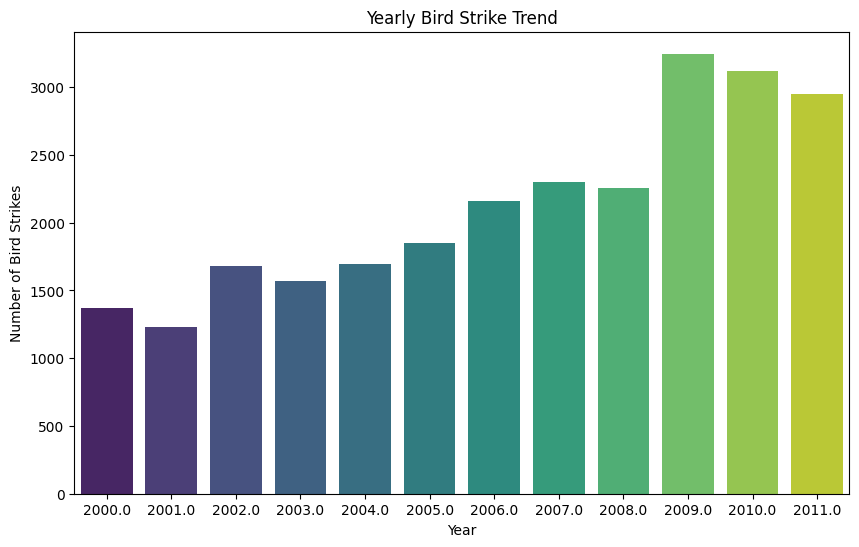

In [9]:
# Yearly Bird Strike Trend: Line chart
plt.figure(figsize=(10, 6))
sns.countplot(x=pd.to_datetime(df['FlightDate']).dt.year, palette='viridis')
plt.title('Yearly Bird Strike Trend')
plt.xlabel('Year')
plt.ylabel('Number of Bird Strikes')
plt.show()

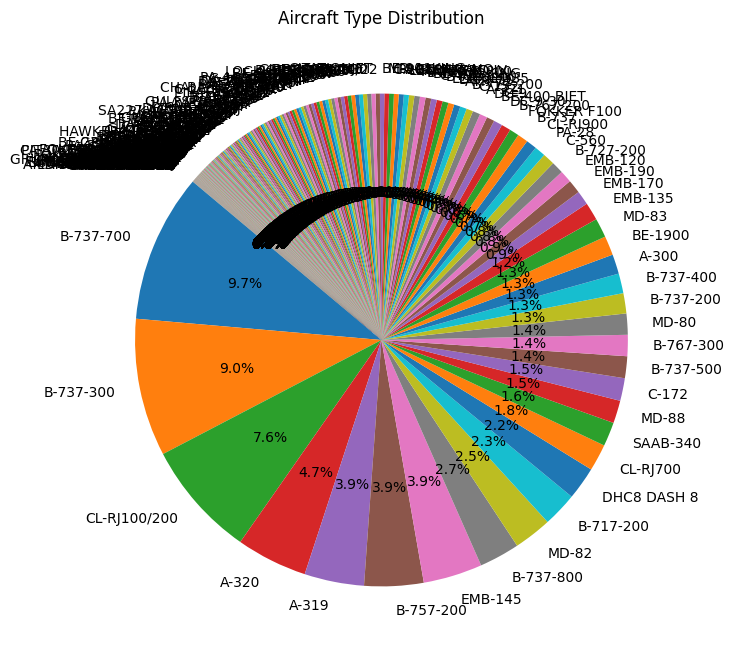

In [10]:
# Aircraft Type Distribution: Pie chart
plt.figure(figsize=(8, 8))
df['Aircraft: Make/Model'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title('Aircraft Type Distribution')
plt.ylabel('')
plt.show()

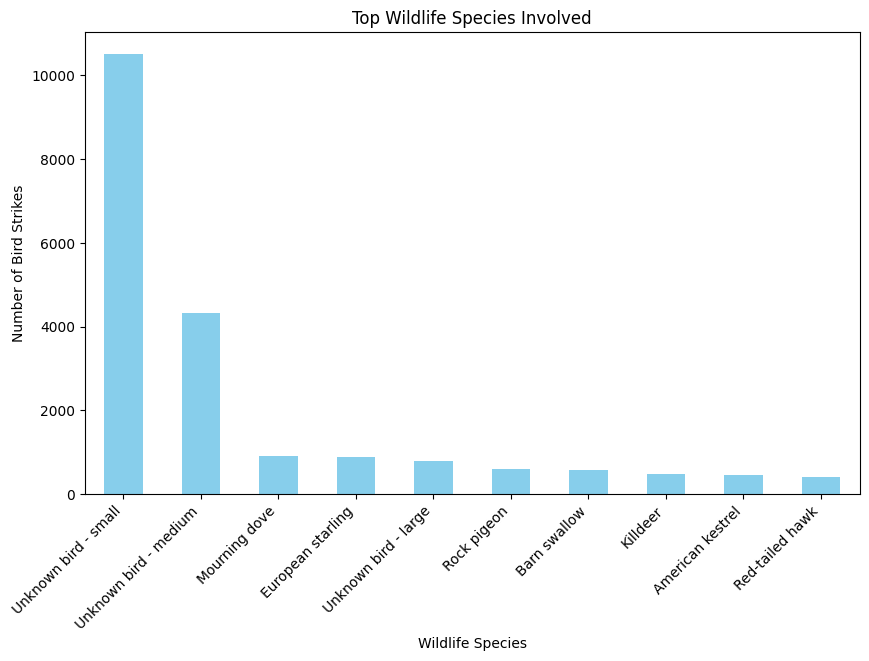

In [11]:
# Top Wildlife Species Involved: Bar chart
plt.figure(figsize=(10, 6))
top_species = df['Wildlife: Species'].value_counts().nlargest(10)
top_species.plot(kind='bar', color='skyblue')
plt.title('Top Wildlife Species Involved')
plt.xlabel('Wildlife Species')
plt.ylabel('Number of Bird Strikes')
plt.xticks(rotation=45, ha='right')
plt.show()

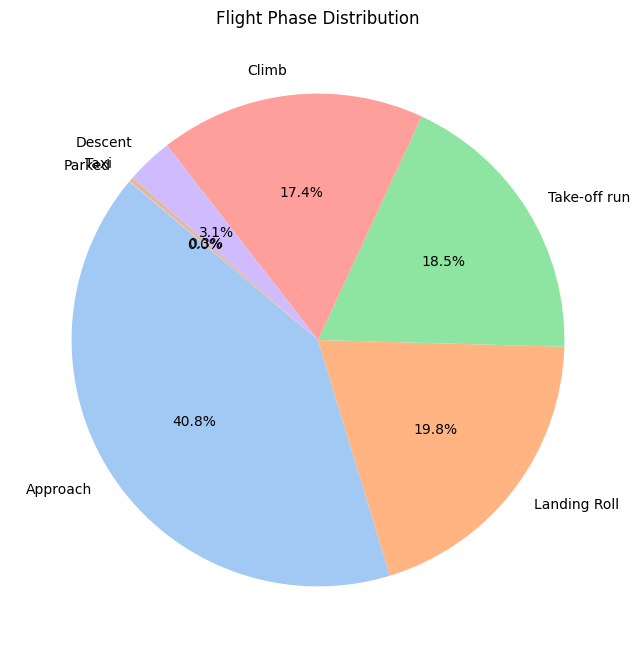

In [12]:
# Flight Phase Distribution: Donut chart
plt.figure(figsize=(8, 8))
flight_phase_counts = df['When: Phase of flight'].value_counts()
plt.pie(flight_phase_counts, labels=flight_phase_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title('Flight Phase Distribution')
plt.show()

<Figure size 1000x600 with 0 Axes>

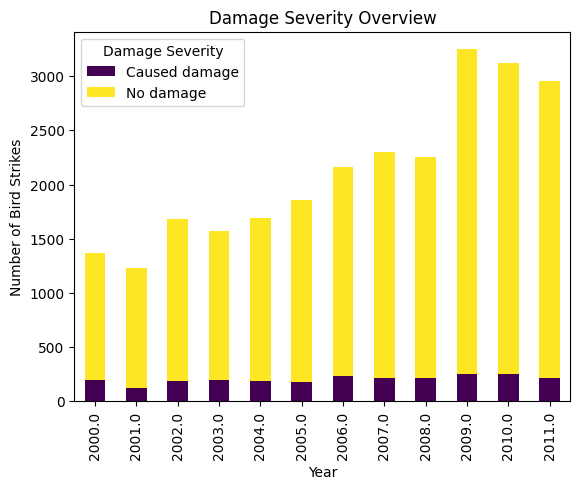

In [13]:
# Damage Severity Overview: Stacked bar chart
plt.figure(figsize=(10, 6))
damage_severity = df.groupby(pd.to_datetime(df['FlightDate']).dt.year)['Effect: Indicated Damage'].value_counts().unstack().fillna(0)
damage_severity.plot(kind='bar', stacked=True, colormap='viridis')
plt.title('Damage Severity Overview')
plt.xlabel('Year')
plt.ylabel('Number of Bird Strikes')
plt.legend(title='Damage Severity')
plt.show()